In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and Processing

In [25]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [26]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [27]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [28]:
gold_data.shape

(2290, 6)

In [29]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [30]:
gold_data.isnull()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2285,False,False,False,False,False,False
2286,False,False,False,False,False,False
2287,False,False,False,False,False,False
2288,False,False,False,False,False,False


In [31]:
gold_data.isnull().sum()#getting missing values

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [32]:
#getting stastical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


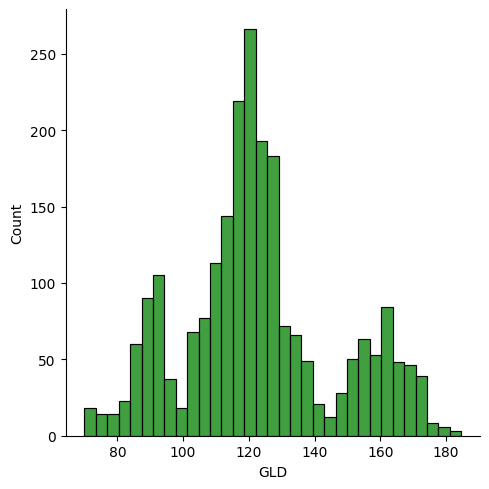

In [33]:
sns.displot(gold_data['GLD'], color='green')

In [34]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [35]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [36]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [37]:
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

Model Training:
Random Forest Regressor

In [38]:
regressor = RandomForestRegressor(n_estimators=100)

In [39]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [40]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [41]:
print(test_data_prediction)

[168.64529939  81.56500014 115.97559966 127.69700089 120.74880152
 154.68949769 150.35149822 126.05689999 117.45559883 125.99130089
 116.68460075 171.15490069 141.42329824 167.89279873 115.24700052
 117.79070016 139.00280288 170.44520143 159.50260292 159.26529958
 155.11679986 125.04969972 175.73369974 157.22170367 125.19790042
  93.83049989  77.62900036 120.60130029 119.13249951 167.45370035
  88.26060034 125.21200025  91.22790117 117.73390019 121.16219897
 136.24840015 115.58780139 115.06090054 147.03079972 107.10680077
 103.85260232  87.2823979  126.53000041 118.25149948 153.04499894
 119.5969001  108.27200032 107.98549819  93.21810091 127.10079786
  75.02420046 113.65269897 121.26900011 111.37189912 118.81009877
 120.55889941 159.97930015 168.04910098 146.80139644  85.99379903
  94.35910017  86.89769879  90.64790034 119.06250057 126.37290098
 127.68609993 171.50350055 122.26679965 117.34789933  98.2003002
 168.58150033 143.40699834 132.00690214 121.21440245 121.398299
 119.75050057

In [42]:
#using r square error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("r squared error: ", error_score)

r squared error:  0.9887950225113243


Compare the Actual and predicted Values in a plot

In [43]:
Y_test = list(Y_test)

In [44]:
print(Y_test)

[168.020004, 81.230003, 112.32, 127.589996, 119.620003, 154.210007, 148.910004, 126.190002, 117.470001, 125.739998, 115.379997, 167.119995, 141.630005, 169.559998, 115.599998, 119.669998, 132.949997, 170.399994, 159.369995, 173.529999, 154.720001, 128.119995, 177.720001, 157.190002, 125.309998, 93.400002, 76.790001, 119.690002, 118.989998, 167.389999, 87.5, 124.980003, 91.230003, 115.489998, 120.949997, 133.809998, 116.690002, 113.809998, 133.580002, 105.970001, 105.120003, 87.959999, 126.82, 116.860001, 159.259995, 119.459999, 109.160004, 108.620003, 93.269997, 127.160004, 72.260002, 113.470001, 119.68, 109.139999, 119.309998, 120.050003, 159.889999, 161.490005, 146.740005, 85.809998, 93.709999, 85.550003, 91.029999, 118.489998, 126.449997, 126.980003, 171.699997, 122.400002, 116.410004, 97.959999, 169.630005, 142.639999, 131.809998, 121.360001, 124.0, 119.699997, 113.889999, 118.919998, 105.639999, 127.669998, 114.32, 107.309998, 114.82, 119.230003, 86.860001, 87.010002, 147.729996, 

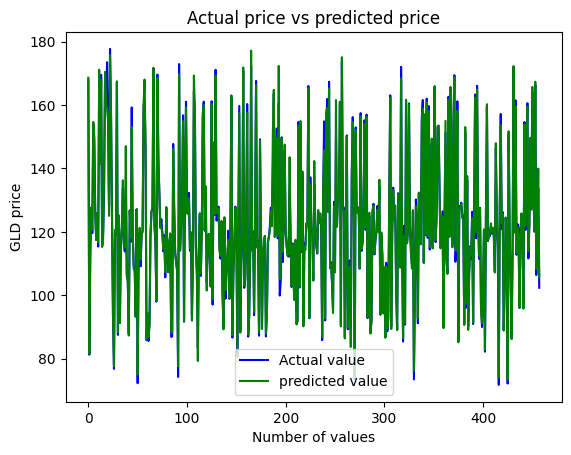

In [45]:
plt.plot(Y_test, color= 'blue', label='Actual value')
plt.plot(test_data_prediction, color= 'green', label = 'predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [47]:
import joblib

# Save the trained model to a .pkl file
joblib.dump(regressor, '/content/gold_price_model.pkl')


['/content/gold_price_model.pkl']